In [1]:
import os
os.chdir("../")

In [115]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

# Model
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer

# Others
import torch
import numpy as np
import pycocotools
from pycocotools.coco import COCO
from matplotlib import pyplot as plt
import cv2
from PIL import Image, ImageDraw
from imantics import Polygons, Mask

## Model Setup

In [3]:
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

## Generate Prediction

In [8]:
res = []
for file_path in os.listdir("data/raw/test/images/"):
    img = cv2.imread("data/raw/test/images/" + file_path)
    outputs = predictor(img)
    print(file_path)
    if len(outputs["instances"]) == 0:
        res.append(file_path)
    else:
        print(len(outputs["instances"]))
        for i in range(len(outputs["instances"])):
            output_mask = Mask(outputs["instances"].pred_masks[i])
            output_seg = output_mask.polygons().segmentation
            seg_all = ''
            for a in output_seg:
                seg = ''
                for i, b in enumerate(a):
                    if i+1 == len(a):
                        seg = seg + str(b)
                    else:
                        seg = seg + str(b) + ","
                seg = "(" + seg + ")"
                seg_all = seg_all + seg
            seg_all = "[" + seg_all + "]"
            base = '0,' * 45
            base = '485.0,144.0,2,529.0,189.0,2,490.0,186.0,2,444.0,162.0,2,386.0,143.0,1,375.0,158.0,2,503.0,224.0,2,517.0,274.0,2,502.0,301.0,2,375.0,255.0,2,333.0,300.0,2,271.0,362.0,2,416.0,296.0,2,386.0,343.0,2,308.0,398.0,2,'
            res.append(file_path + ',' + base + seg_all)

893965.png
1
040364.png
1
223135.jpg
1
581725.png
1
617674.png
1
482414.jpg
2
049790.jpg
469258.png
1
682902.png
2
045753.png
1
336738.jpg
2
756398.jpg
1
838266.jpg
1
569063.png
1
346998.jpg
1
734108.jpg
1
154048.png
1
549011.jpg
1
779547.png
1
423418.png
1
404058.png
1
411737.png
1
354447.png
1
790432.png
1
641647.png
1
453774.jpg
834614.png
1
397023.png
1
512448.png
1
926239.png
1
449272.png
1
123869.jpg
2
819192.png
1
181012.png
2
842342.jpg
1
083823.png
1
314488.png
1
760130.png
1
931570.png
175558.png
1
731747.png
1
283868.png
1
609620.jpg
852567.jpg
265135.png
1
039383.png
1
794528.png
2
347795.png
1
998531.png
1
683246.jpg
939658.png
1
012499.png
1
539372.png
1
105126.png
1
723147.png
2
743881.png
2
404838.png
2
546821.png
1
451420.png
1
834021.png
1
457481.png
1
914737.jpg
845949.png
1
927167.png
1
668137.png
1
403277.png
1
313940.png
1
952076.png
1
080202.png
1
662425.png
1
352711.png
1
504095.png
1
222023.png
1
549397.png
2
155574.jpg
1
377382.jpg
2
739196.png
1
529922.jpg
51

In [9]:
with open('data/sub/baseline_zero/solution/images/annotations/solution.txt', 'w') as f:
    for item in res:
        f.write("%s\n" % item)

In [150]:
res = []
for file_path in ['771734.jpg','895632.jpg']:
    img = cv2.imread("data/raw/train/images/" + file_path)
    outputs = predictor(img)
    print(file_path)
    if len(outputs["instances"]) == 0:
        res.append(file_path)
    else:
        print(len(outputs["instances"]))
        for i in range(len(outputs["instances"])):
            # output_mask = Mask(outputs["instances"].pred_masks[i])
            # output_seg = output_mask.polygons().segmentation

            output_pred = outputs["instances"].pred_masks[i]
            output_pred = np.array(output_pred, dtype=np.uint8) 
            contours = measure.find_contours(output_pred, 0.5)

            output_seg = []
            for contour in contours:
                contour = np.flip(contour, axis=1)
                segmentation = contour.ravel().tolist()
                output_seg.append(segmentation)

            seg_all = ''
            for a in output_seg:
                seg = ''
                for i, b in enumerate(a):
                    if i+1 == len(a):
                        seg = seg + str(b)
                    else:
                        seg = seg + str(b) + ","
                seg = "(" + seg + ")"
                seg_all = seg_all + seg
            seg_all = "[" + seg_all + "]"
            base = '0,' * 45
            base = '485.0,144.0,2,529.0,189.0,2,490.0,186.0,2,444.0,162.0,2,386.0,143.0,1,375.0,158.0,2,503.0,224.0,2,517.0,274.0,2,502.0,301.0,2,375.0,255.0,2,333.0,300.0,2,271.0,362.0,2,416.0,296.0,2,386.0,343.0,2,308.0,398.0,2,'
            res.append(file_path + ',' + base + seg_all)

with open('data/raw/train/images/annotations/pred2d.txt', 'w') as f:
    for item in res:
        f.write("%s\n" % item)

771734.jpg
1
895632.jpg
1


## Test

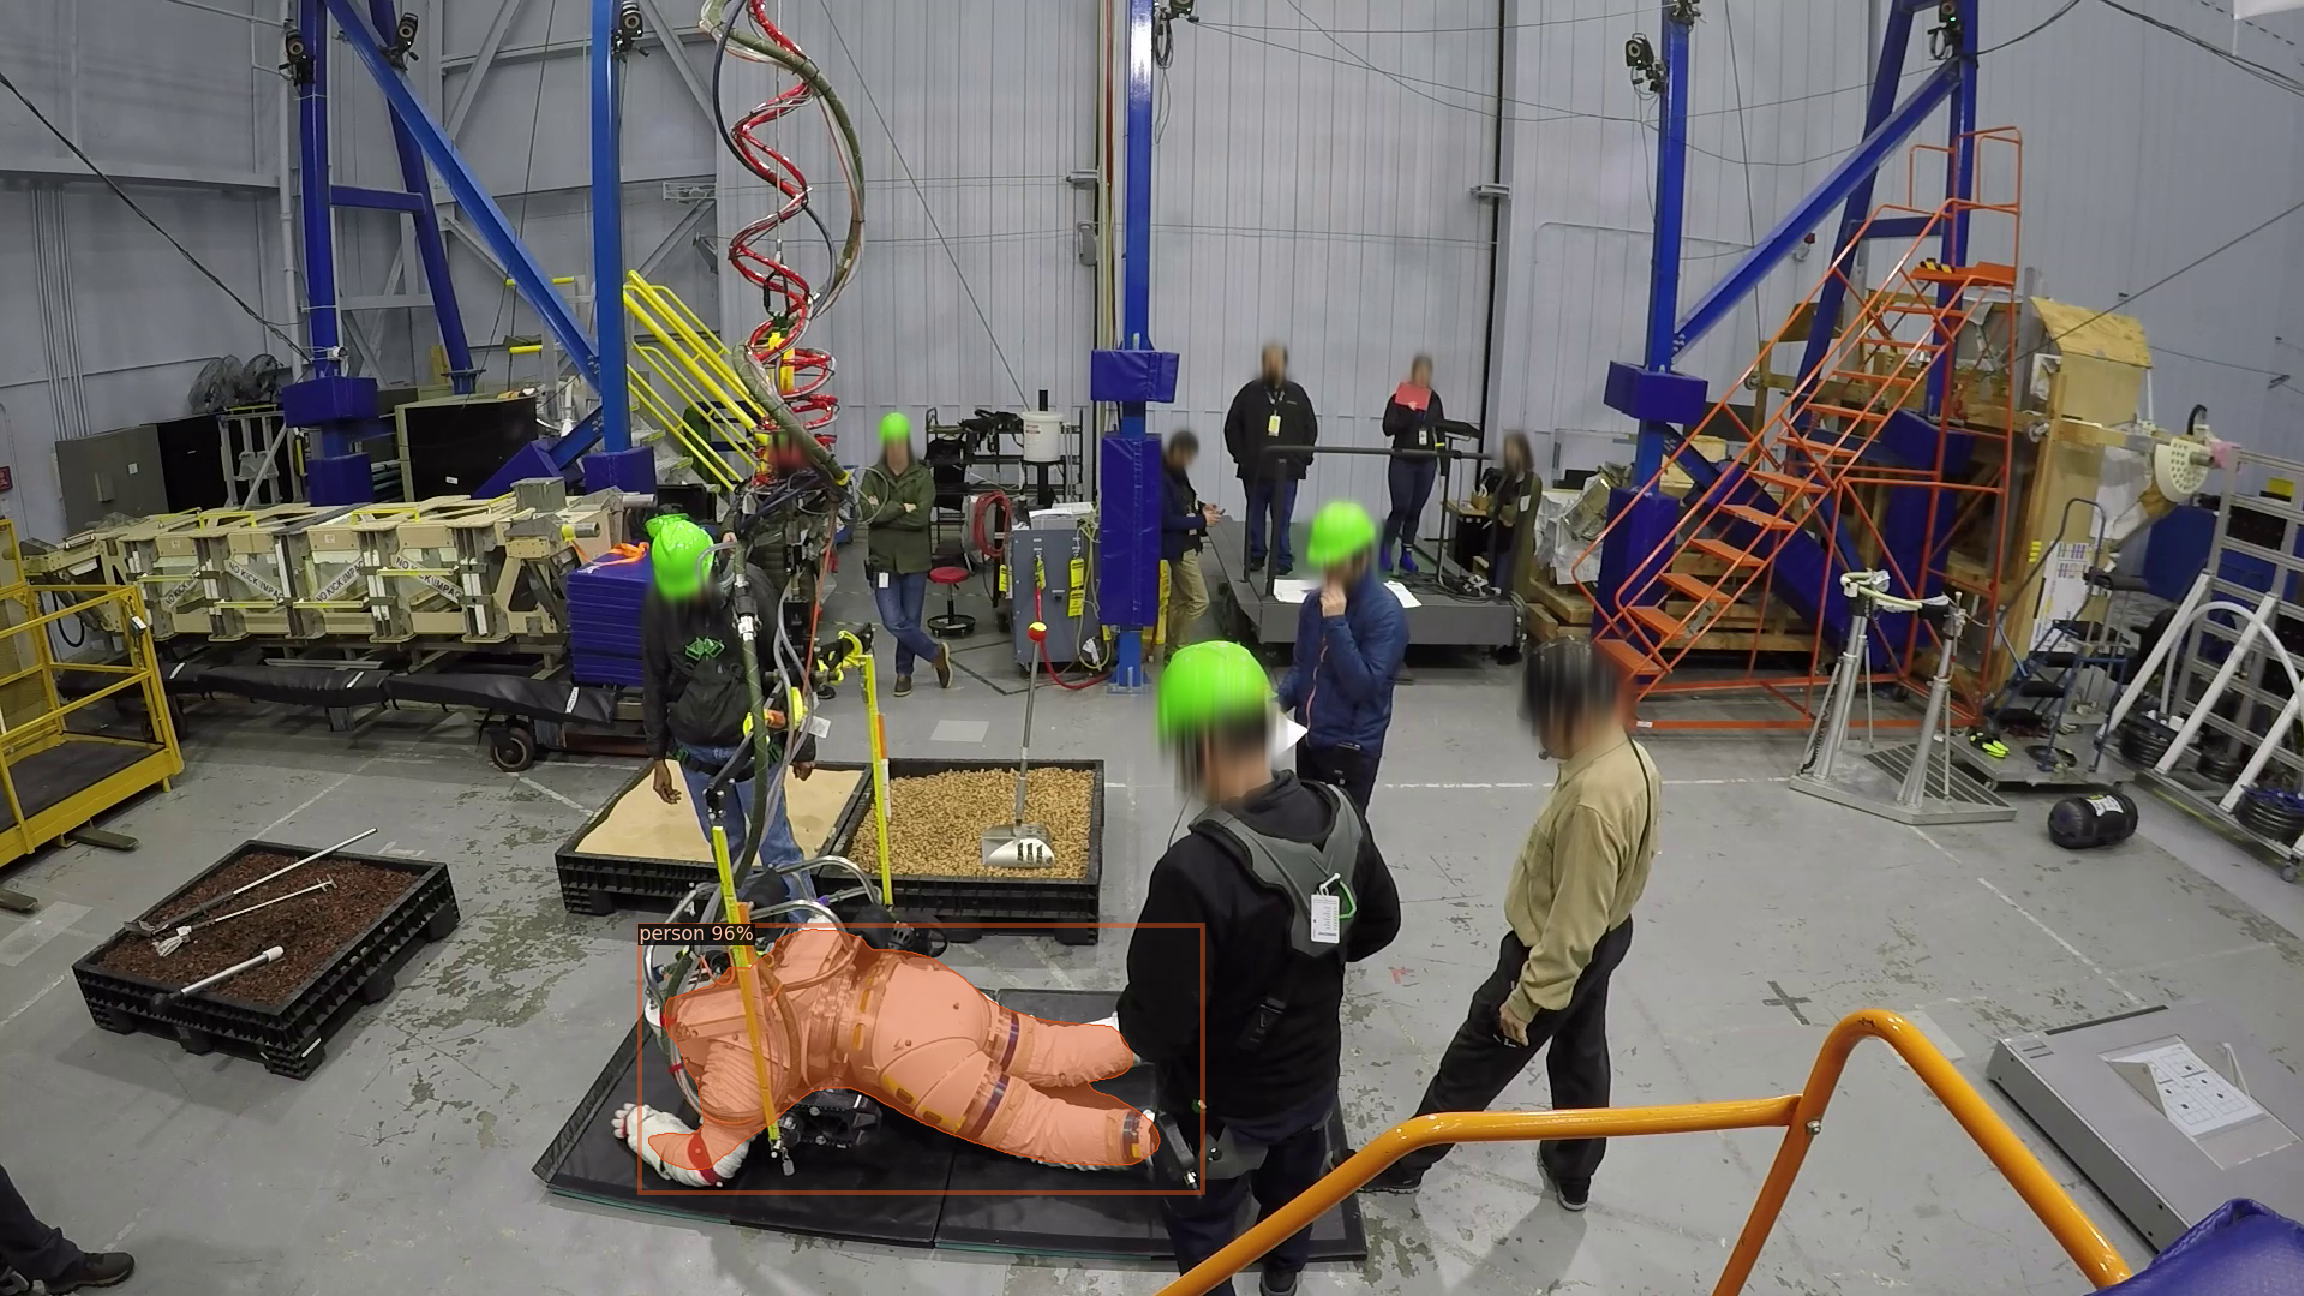

In [15]:
im = cv2.imread("data/raw/train/images/118330.png")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

display(Image.fromarray(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)))

In [16]:
output_mask = Mask(outputs["instances"].pred_masks[0])
output_seg = output_mask.polygons().segmentation
len(output_seg)

1

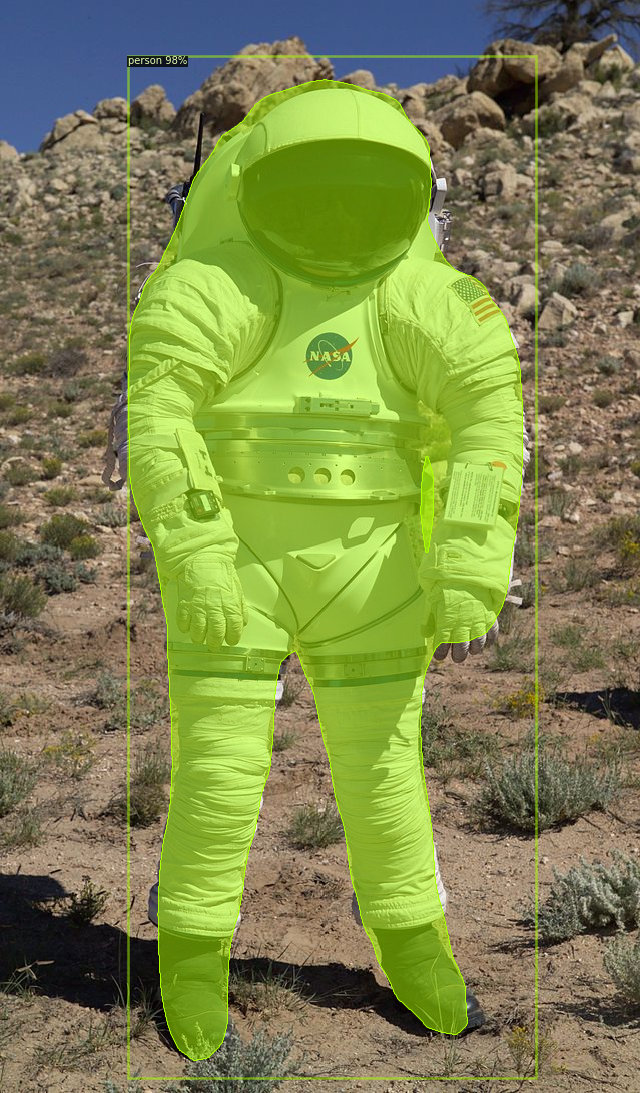

In [49]:
im = cv2.imread("data/raw/train/images/771734.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

display(Image.fromarray(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)))

In [108]:
# output_mask = Mask(torch.transpose(outputs["instances"].pred_masks[0], 0, 1))
output_pred = outputs["instances"].pred_masks[0]
output_pred = np.array(output_pred, dtype=np.uint8)
# output_pred = np.where(output_pred == 1, 0, 1)
# output_pred = output_pred.T
output_mask = Mask(output_pred)
output_seg = output_mask.polygons().segmentation
# len(output_seg)

In [109]:
output_pred.shape

(1093, 640)

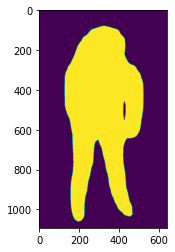

In [110]:
plt.imshow(output_pred)

In [111]:
outputs["instances"].pred_boxes

Boxes(tensor([[ 128.0189,   56.4285,  536.3765, 1078.2522]]))

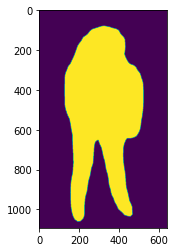

In [127]:
img = Image.new('L', (640, 1093), 0)
ImageDraw.Draw(img).polygon(output_seg[1], outline=1, fill=1)
mask = np.array(img)

plt.imshow(mask)

Use this :)
https://github.com/matterport/Mask_RCNN/issues/1894

In [136]:
from skimage import measure

In [149]:
contours = measure.find_contours(output_pred, 0.5)

seg = []
for contour in contours:
    contour = np.flip(contour, axis=1)
    segmentation = contour.ravel().tolist()
    seg.append(segmentation)

seg[0][0:10]

[196.0, 1060.5, 195.0, 1060.5, 194.0, 1060.5, 193.0, 1060.5, 192.5, 1060.0]